In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import zipfile
#zip_file = zipfile.ZipFile('retail-data-analytics.zip', 'r')
#zip_file.namelist()

In [15]:
features=pd.read_csv('../input/Features_data_set.csv')
sales=pd.read_csv('../input/sales_data-set.csv')
stores=pd.read_csv('../input/stores_data-set.csv')

In [16]:
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [17]:
print(features.shape)
print(sales.shape)
print(stores.shape)

print(sales[0:1].Date, sales[-1:].Date)

print(features[0:1].Date, features[-1:].Date)

(8190, 12)
(421570, 5)
(44, 3)
0   2010-05-02
Name: Date, dtype: datetime64[ns] 421569   2012-10-26
Name: Date, dtype: datetime64[ns]
0   2010-05-02
Name: Date, dtype: datetime64[ns] 8189   2013-07-26
Name: Date, dtype: datetime64[ns]


In [18]:
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,stores, on=['Store'], how='left')

df=df.fillna(0)
df['Temperature'] = (df['Temperature']- 32) * 5./9.

types_encoded, types =df['Type'].factorize()
df['Type'] = types_encoded

df.head()

KeyError: 'Store'

In [20]:
print('training_data duplicated:{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)

training_data duplicated:0


In [21]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [22]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column Type'}) 
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
column Type,int64,int64,datetime64[ns],float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0
null values (%),0,0,0,0,0,0,0,64.2572,73.611,67.4808,67.9847,64.079,0,0


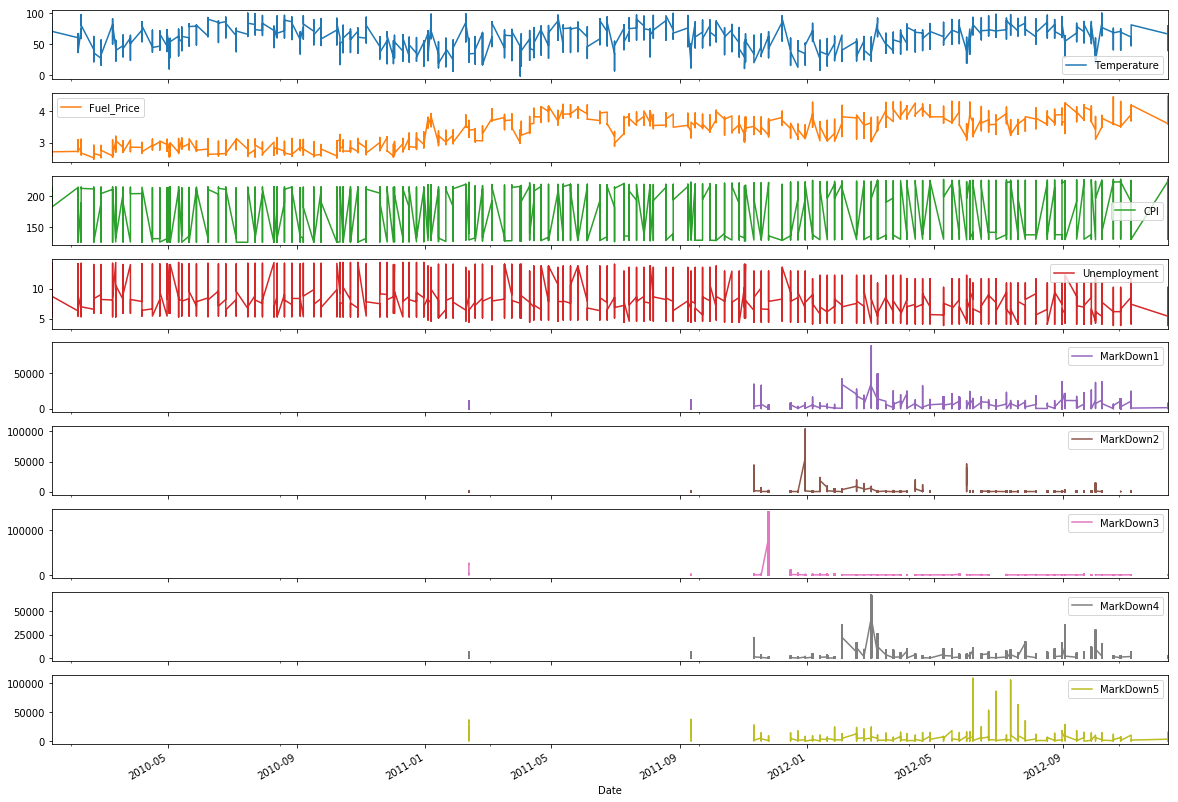

In [23]:
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

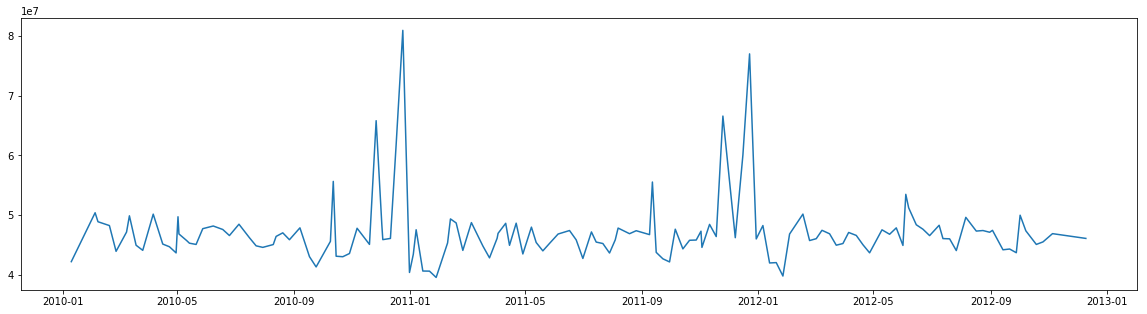

In [24]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

## Get more insights

In [25]:
# The more remunerative weeks
df_average_sales.head()

,Date,Weekly_Sales
46,2010-12-24,80931415.60
98,2011-12-23,76998241.31
95,2011-11-25,66593605.26
41,2010-11-26,65821003.24
45,2010-12-17,61820799.85


In [26]:
# The least remunerative weeks
df_average_sales[::-1].head()

,Date,Weekly_Sales
52,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
51,2011-01-21,40654648.03
50,2011-01-14,40673678.04


In [27]:
# The least remunerative weeks
df_average_sales[::-1].head()

,Date,Weekly_Sales
52,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
51,2011-01-21,40654648.03
50,2011-01-14,40673678.04


In [28]:
ts = df_average_sales_week.set_index('Date')
#ts = ts.resample('H').ffill()
#ts = ts.resample('W').sum()

In [29]:
# The least remunerative weeks
df_average_sales[::-1].head()

,Date,Weekly_Sales
52,2011-01-28,39599852.99
103,2012-01-27,39834974.67
47,2010-12-31,40432519.00
51,2011-01-21,40654648.03
50,2011-01-14,40673678.04


In [30]:
# Top performing type of stores in term of sales
df_top_stores = df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

KeyError: 'Type'

In [31]:
# Top performing stores in term of sales
df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


## Forecast of the total sales volume

C:\Users\22\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


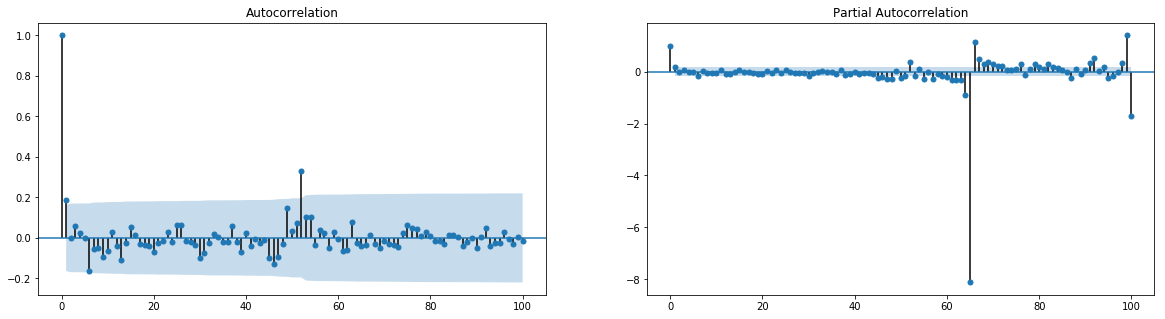

In [32]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts, lags=100, ax=axes[0])
plot_pacf(ts, lags=100, ax=axes[1])
plt.show()

## Model definition

In [33]:
from sklearn.linear_model import LinearRegression

def fit_ar_model(ts, orders):
    
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    
    mask = ~np.isnan(X[:,:1]).squeeze()
    
    Y= ts.values
    
    lin_reg=LinearRegression()
    
    lin_reg.fit(X[mask],Y[mask])
    
    print(lin_reg.coef_, lin_reg.intercept_)

    print('Score factor: %.2f' % lin_reg.score(X[mask],Y[mask]))
    
    return lin_reg.coef_, lin_reg.intercept_
    
def predict_ar_model(ts, orders, coef, intercept):
    return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) + intercept  if i >= np.max(orders) else np.nan for i in range(len(ts))])

[[ 0.13488444 -0.06693086  0.53027452]] [19022705.56418593]
Score factor: 0.41


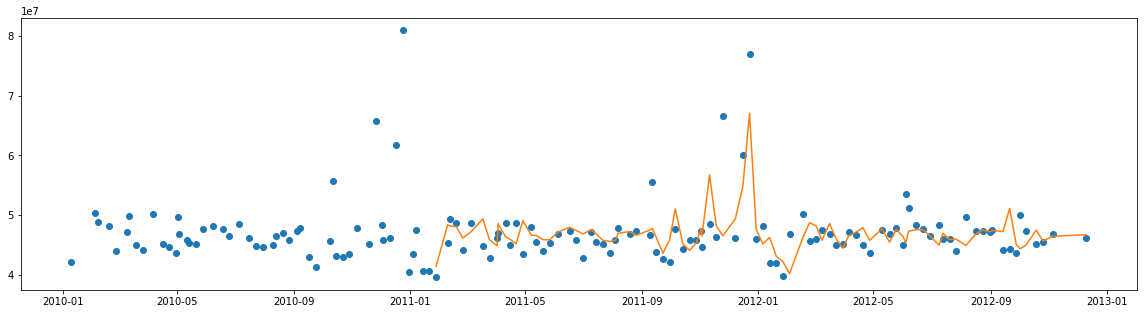

In [34]:
orders=np.array([1,6,52])
coef, intercept = fit_ar_model(ts,orders)
pred=pd.DataFrame(index=ts.index, data=predict_ar_model(ts, orders, coef, intercept))
plt.figure(figsize=(20,5))
plt.plot(ts, 'o')
plt.plot(pred)
plt.show()

AR Residuals: avg -0.00, std 0.07


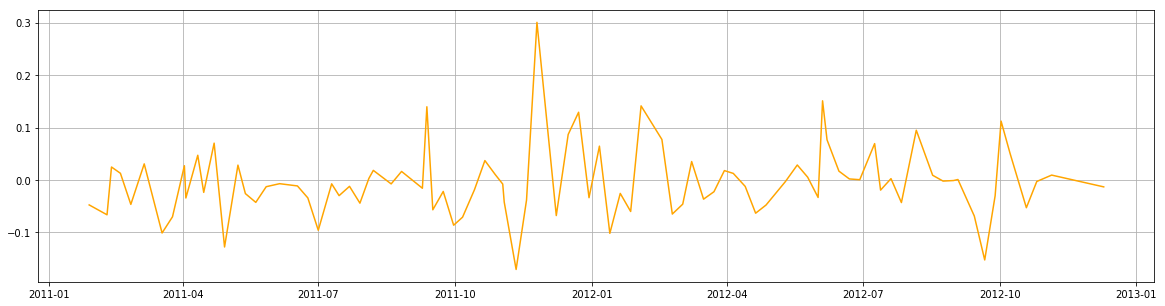

In [35]:
diff=(ts['Weekly_Sales']-pred[0])/ts['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
plt.figure(figsize=(20,5))
plt.plot(diff, c='orange')
plt.grid()
plt.show()